The graphs of Odds and Logit

/tmp/ipykernel_23714/3026663265.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Probablity')

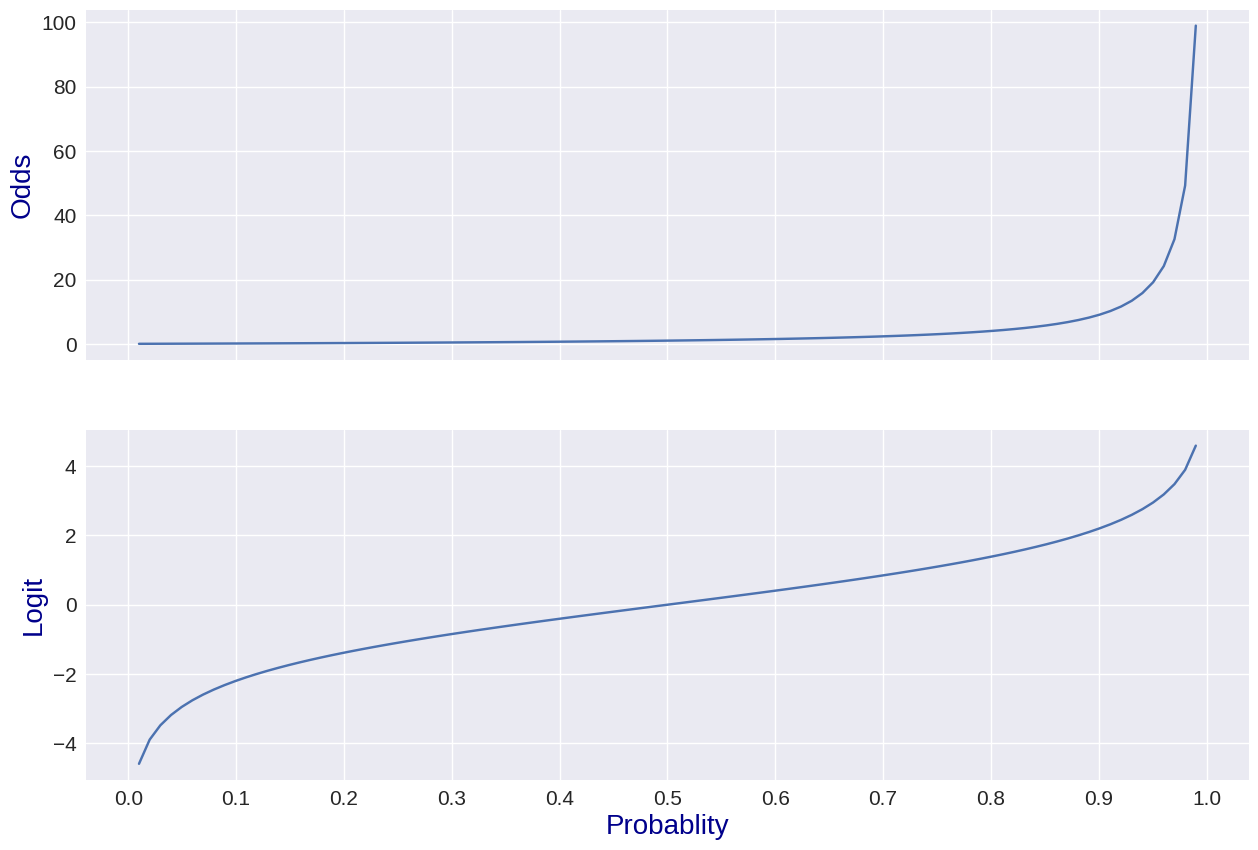

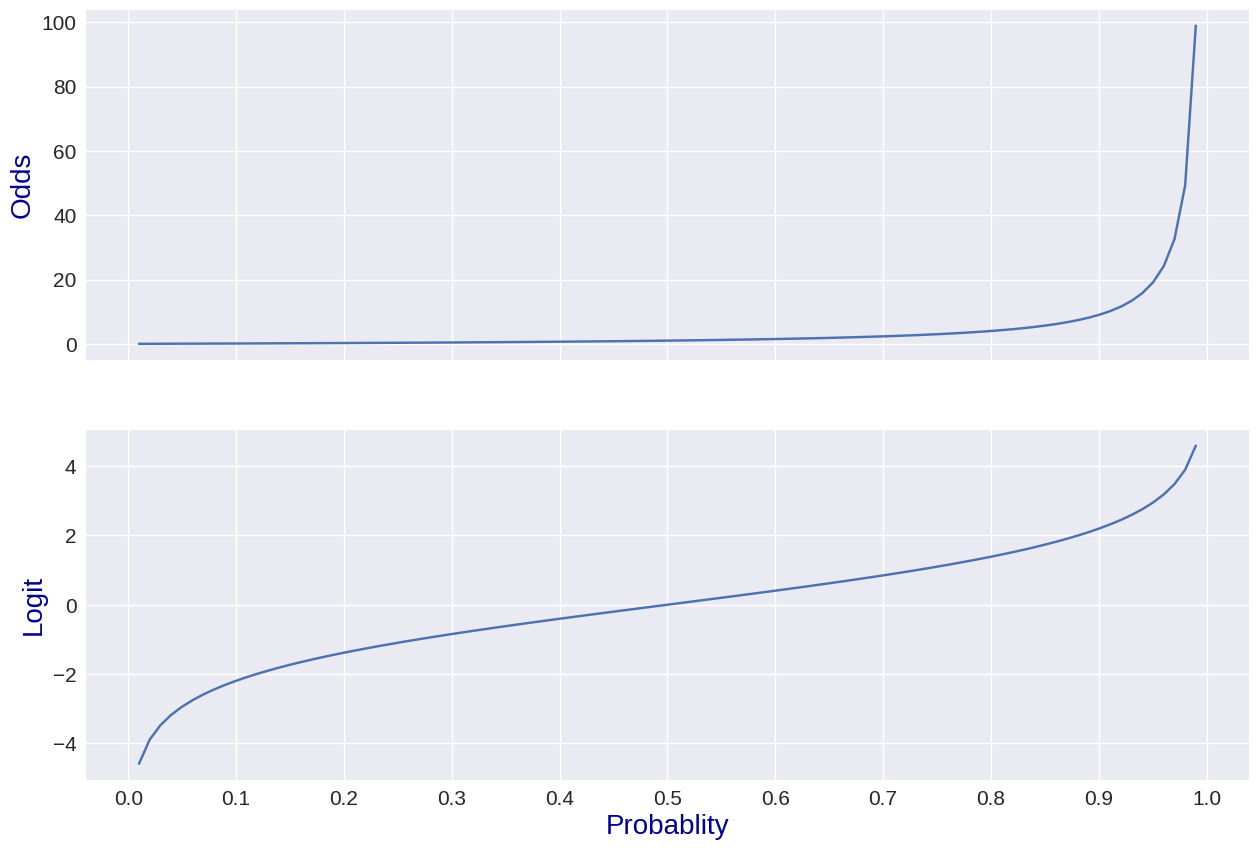

In [8]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('seaborn')

p_np = np.linspace(0.01, 0.99, 100)
odds_np = p_np / (1-p_np)
logit_np = np.log(odds_np)

p_tf = tf.linspace(0.01, 0.99, 100)
odds_tf = p_tf/(1-p_tf)
logit_tf = tf.math.log(odds_tf)

# numpy
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_np)

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')

axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probablity', fontsize=20, color='darkblue')

# tensorflow
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
axes[0].plot(p_tf, odds_tf)
axes[1].plot(p_tf, logit_tf)

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')

axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probablity', fontsize=20, color='darkblue')

The graphs of sigmoid

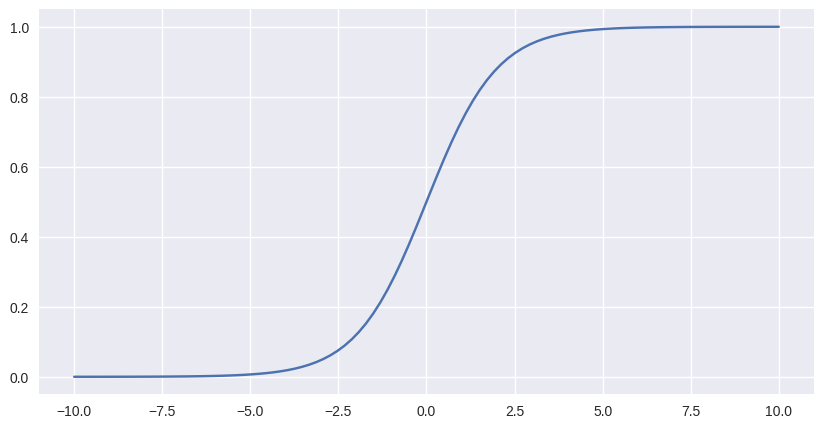

In [10]:
import tensorflow as tf

from tensorflow.keras.layers import Activation

X = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(X)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X.numpy(), sigmoid.numpy())

Logisitic Regression Model

(100, 1)
[[1.2177144]] [0.]


/tmp/ipykernel_23714/4031191056.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


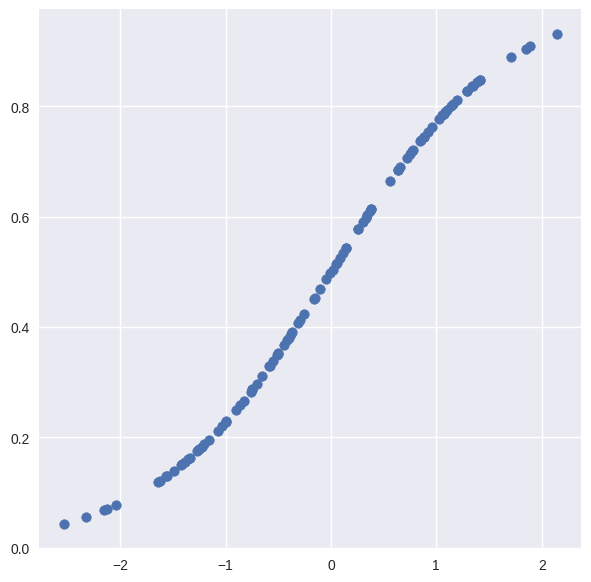

In [31]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100, 1))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)

w, b = dense.get_weights() # graph dependes on sign of w parameter
print(w, b)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

In [32]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100, 5))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape) # Even though n_features is not 1, Y shape is (N, 1)

(100, 1)


/tmp/ipykernel_23714/1859261581.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Binary classifier with Dense layers

In [35]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Softamx Layers

In [7]:
import tensorflow as tf

from tensorflow.keras.layers import Activation

logits = tf.random.uniform(shape=(2, 5), minval=-10, maxval=10)

softmax_value = Activation('softmax')(logits)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print("Logits: ", logits.numpy())
print("Probabilities: ", softmax_value.numpy())
print("Sum of softmax values: ", softmax_sum)

Logits:  [[ 3.141859    5.4216404   7.0382576  -0.40072632  9.538799  ]
 [ 0.5088825   4.8757696   3.34239     9.91296    -5.509677  ]]
Probabilities:  [[1.5150721e-03 1.4809137e-02 7.4579187e-02 4.3843778e-05 9.0905279e-01]
 [8.1735554e-05 6.4405948e-03 1.3899134e-03 9.9208754e-01 1.9887668e-07]]
Sum of softmax values:  tf.Tensor([1.         0.99999994], shape=(2,), dtype=float32)


In [8]:
import tensorflow as tf

from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense

logit = tf.random.uniform(shape=(2, 5), minval=-10, maxval=10)
dense = Dense(units=8, activation='softmax')

Y = dense(logit)
print(tf.reduce_sum(Y, axis=1))

tf.Tensor([1. 1.], shape=(2,), dtype=float32)


In [9]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

class TestModel(Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.dense1 = Dense(units=8, activation='relu')
        self.dense2 = Dense(units=5, activation='relu')
        self.dense3 = Dense(units=3, activation='softmax')

    def call(self, x):
        print("X: {}\n".format(X.numpy()))
        
        x = self.dense1(x)
        print("A1: {}\n".format(x.numpy()))

        x = self.dense2(x)
        print("A2: {}\n".format(x.numpy()))

        x = self.dense3(x)
        print("Y: {}\n".format(x.numpy()))
        print("Sum of vectors: {}\n".format(tf.reduce_sum(x, axis=1)))

        return x

model = TestModel()

X = tf.random.uniform(shape=(8, 5), minval=-10, maxval=10)
Y = model(X)

X: [[ 0.9434147  -1.0987806   8.410534    8.684956    8.979265  ]
 [ 3.804062    9.3782425  -1.6238165   5.031555   -9.645803  ]
 [ 3.506217    8.11179    -1.2230129  -4.6857357   1.3596458 ]
 [ 4.353277   -3.3893132   5.044195   -4.1788316  -6.912861  ]
 [ 2.7151985  -7.750168    6.4562683   0.05778503 -3.9227343 ]
 [ 8.676117   -6.1765766  -1.0596962  -1.243515    2.3929863 ]
 [-4.622071   -6.46379     0.11621475  1.9058018   9.666536  ]
 [-2.8003478   9.817305   -0.2600336  -0.67762184 -4.87164   ]]

A1: [[ 8.932481    4.0941358   0.          0.          4.884646    0.
   6.8058124   0.        ]
 [ 0.          8.826512    0.         10.683981    0.          0.
   4.8451886   7.4765043 ]
 [ 2.8796914   0.          1.177853    2.2785933   5.5094056   0.
   0.          7.704845  ]
 [ 0.          2.9911022   0.          7.764268    2.8861449   0.
   0.          2.0627515 ]
 [ 0.          3.2407734   0.          4.684025    1.4153839   2.0380976
   0.          0.        ]
 [ 0.          